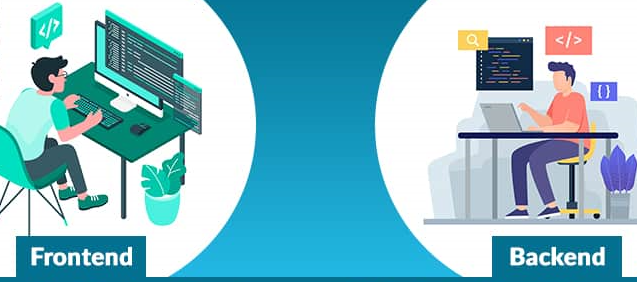

##### Backend

###### Import Libraies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import load  # Using
from joblib import dump


In [2]:

# Load the dataset
data = pd.read_csv('PurchaseData.csv')


In [3]:
data.head()

,Age,Gender,Income,Browsing_Hours,Cart_Abandonment,Purchase
0,23,Male,45000,1.5,Yes,0
1,35,Female,80000,3.0,No,1
2,45,Female,60000,2.2,Yes,0
3,30,Male,75000,4.0,No,1
4,50,Female,55000,2.7,Yes,0


In [4]:
# Preprocess the data
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)
X = data.drop('Purchase', axis=1)
y = data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.67
Confusion Matrix:
 [[0 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# Save the model
from joblib import dump
dump(model, 'random_forest_model.joblib')

from joblib import dump
# Save the scaler
dump(scaler, 'scaler.joblib')



['scaler.joblib']

##### Frontend

In [1]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk  # For image handling
from joblib import load

# Load the model and scaler
model = load('random_forest_model.joblib')
scaler = load('scaler.joblib')

# Function to process user input and make predictions
def predict():
    try:
        # Get user inputs
        inputs = [
            float(entry_age.get()),
            1 if gender_var.get() == "Male" else 0,  # Gender encoding: Male=1, Female=0
            float(entry_income.get()),
            float(entry_browsing_hours.get()),
            1 if cart_var.get() == "Yes" else 0  # Cart Abandonment encoding: Yes=1, No=0
        ]

        # Preprocess the input
        inputs_scaled = scaler.transform([inputs])

        # Make prediction
        prediction = model.predict(inputs_scaled)[0]

        # Display result
        if prediction == 1:  # Purchased
            result_label.config(text="Purchased", fg="green")
            pictogram_label.config(image=purchase_image)
        else:  # Not Purchased
            result_label.config(text="Not Purchased", fg="red")
            pictogram_label.config(image=not_purchase_image)

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Initialize the Tkinter window
root = tk.Tk()
root.title("Purchase Prediction")
root.geometry("400x400")
root.configure(bg="#2C2C2C")  # Dark theme

# Load pictograms
purchase_image = ImageTk.PhotoImage(Image.open("purchase.png").resize((100, 100)))
not_purchase_image = ImageTk.PhotoImage(Image.open("not_purchase.png").resize((100, 100)))

# Add input fields and labels
label_fg = "white"
entry_bg = "#444444"
entry_fg = "white"

tk.Label(root, text="Enter Age:", bg="#2C2C2C", fg=label_fg).pack(pady=5)
entry_age = tk.Entry(root, bg=entry_bg, fg=entry_fg, insertbackground="white")
entry_age.pack()

tk.Label(root, text="Select Gender:", bg="#2C2C2C", fg=label_fg).pack(pady=5)
gender_var = tk.StringVar(value="Male")
gender_menu = tk.OptionMenu(root, gender_var, "Male", "Female")
gender_menu.configure(bg=entry_bg, fg=entry_fg, highlightbackground="#2C2C2C")
gender_menu.pack()

tk.Label(root, text="Enter Income:", bg="#2C2C2C", fg=label_fg).pack(pady=5)
entry_income = tk.Entry(root, bg=entry_bg, fg=entry_fg, insertbackground="white")
entry_income.pack()

tk.Label(root, text="Enter Browsing Hours:", bg="#2C2C2C", fg=label_fg).pack(pady=5)
entry_browsing_hours = tk.Entry(root, bg=entry_bg, fg=entry_fg, insertbackground="white")
entry_browsing_hours.pack()

tk.Label(root, text="Cart Abandonment:", bg="#2C2C2C", fg=label_fg).pack(pady=5)
cart_var = tk.StringVar(value="Yes")
cart_menu = tk.OptionMenu(root, cart_var, "Yes", "No")
cart_menu.configure(bg=entry_bg, fg=entry_fg, highlightbackground="#2C2C2C")
cart_menu.pack()

# Add Predict button
btn_predict = tk.Button(root, text="Predict", command=predict, bg="#555555", fg="white")
btn_predict.pack(pady=20)

# Add result display
result_label = tk.Label(root, text="", bg="#2C2C2C", fg=label_fg, font=("Helvetica", 16))
result_label.pack(pady=10)

pictogram_label = tk.Label(root, bg="#2C2C2C")
pictogram_label.pack(pady=10)

# Run the Tkinter main loop
root.mainloop()


**Key Points**

> Encoding Adjustments

- Gender: Male=1, Female=0.

- Cart Abandonment: Yes=1, No=0.

> Scalable Design
Handles categorical variables (Gender, Cart_Abandonment) with dropdown menus.

**Ensure Files Exist**

- Ensure random_forest_model.joblib and scaler.joblib exist in the same directory.

**Dataset Alignment**

> This frontend now aligns perfectly with your dataset's structure. Adjust further if needed!